In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score

from tqdm import tqdm
tqdm.pandas()

import seaborn as sns
sns.set(font_scale=1.5)

import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

C:\Users\HaKKe\anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [9]:
import zipfile
with zipfile.ZipFile('dataset/introml-2020-property-prices.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset/property-prices/')

In [2]:
train_df = pd.read_csv('dataset/property-prices/Train.csv')
test_df = pd.read_csv('dataset/property-prices/Test.csv')

In [3]:
# All_zeros = pd.read_csv('dataset/property-prices/SampleSubmission.csv')
# All_zeros['price'] = np.zeros(len(All_zeros))
# All_zeros.to_csv('submission_0.csv', index=None)
mean_absolute_value = 5851954.56518

In [4]:
train_df.shape, test_df.shape

((100000, 25), (100000, 24))

In [5]:
train_df

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,616,0.0,4,43,2,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,1738000
1,1,2011-1,112,0.0,3,33,1,0,15.0,1.0,...,0,0,0,0,0,0,0,0,0,1169000
2,2,2011-1,230,NaN,9,34,1,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,2821000
3,3,2011-1,302,1.0,4,60,3,0,15.0,0.0,...,0,0,0,0,0,0,0,0,0,5714000
4,4,2011-1,578,0.0,3,49,2,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,1660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2012-3,612,0.0,3,36,1,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,3898000
99996,99996,2012-3,573,0.0,4,51,2,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,8698000
99997,99997,2012-3,550,NaN,9,48,2,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,6498000
99998,99998,2012-3,595,1.0,10,51,2,1,15.0,1.0,...,0,0,0,0,0,0,0,0,0,9436000


In [6]:
train_df.dtypes

id              int64
date           object
street_id       int64
build_tech    float64
floor           int64
area            int64
rooms           int64
balcon          int64
metro_dist    float64
g_lift        float64
n_photos        int64
kw1             int64
kw2             int64
kw3             int64
kw4             int64
kw5             int64
kw6             int64
kw7             int64
kw8             int64
kw9             int64
kw10            int64
kw11            int64
kw12            int64
kw13            int64
price           int64
dtype: object

In [7]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,100000.0,4.999950e+04,2.886766e+04,0.0,24999.75,49999.5,74999.25,99999.0
street_id,100000.0,3.346366e+02,1.939479e+02,0.0,166.00,335.0,503.00,671.0
build_tech,69817.0,5.298566e-01,5.823403e-01,0.0,0.00,0.0,1.00,2.0
floor,100000.0,5.375840e+00,4.045109e+00,1.0,2.00,4.0,7.00,25.0
area,100000.0,5.220378e+01,1.755998e+01,29.0,40.00,52.0,60.00,217.0
rooms,100000.0,2.113640e+00,8.261554e-01,1.0,1.00,2.0,3.00,6.0
balcon,100000.0,3.966000e-01,5.529480e-01,0.0,0.00,0.0,1.00,2.0
metro_dist,94943.0,2.191936e+01,8.377479e+00,0.0,15.00,25.0,30.00,30.0
g_lift,70133.0,4.997932e-01,5.000035e-01,0.0,0.00,0.0,1.00,1.0
n_photos,100000.0,2.518600e+00,1.974278e+00,0.0,1.00,2.0,4.00,11.0


In [8]:
mis_cols = train_df.columns[train_df.isna().any(axis=0)]
train_df[mis_cols].isna().sum(axis=0)

build_tech    30183
metro_dist     5057
g_lift        29867
dtype: int64

In [9]:
test_df[mis_cols].isna().sum(axis=0)

build_tech    30213
metro_dist     4913
g_lift        29940
dtype: int64

In [10]:
train_df.loc[train_df.isna().any(axis=1), :].head(10)

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
2,2,2011-1,230,NaN,9,34,1,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,2821000
4,4,2011-1,578,0.0,3,49,2,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,1660000
7,7,2011-1,427,0.0,4,41,2,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,1102000
8,8,2011-1,74,NaN,12,70,2,1,30.0,1.0,...,0,0,0,0,0,0,0,0,0,1000000
9,9,2011-1,365,0.0,6,50,2,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,2910000
10,10,2011-1,555,NaN,24,39,1,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,2744000
11,11,2011-1,55,0.0,7,63,3,0,15.0,NaN,...,0,0,0,0,0,0,0,0,0,3588000
12,12,2011-1,666,0.0,3,34,1,0,15.0,NaN,...,0,0,0,0,0,0,0,0,0,2774000
16,16,2011-1,25,0.0,3,59,3,0,NaN,0.0,...,0,0,0,0,0,0,0,0,0,7181000
18,18,2011-1,145,NaN,5,52,2,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,7455000


In [11]:
train_df.isna().sum(axis=1).value_counts()

0    46575
1    42221
2    10726
3      478
dtype: int64

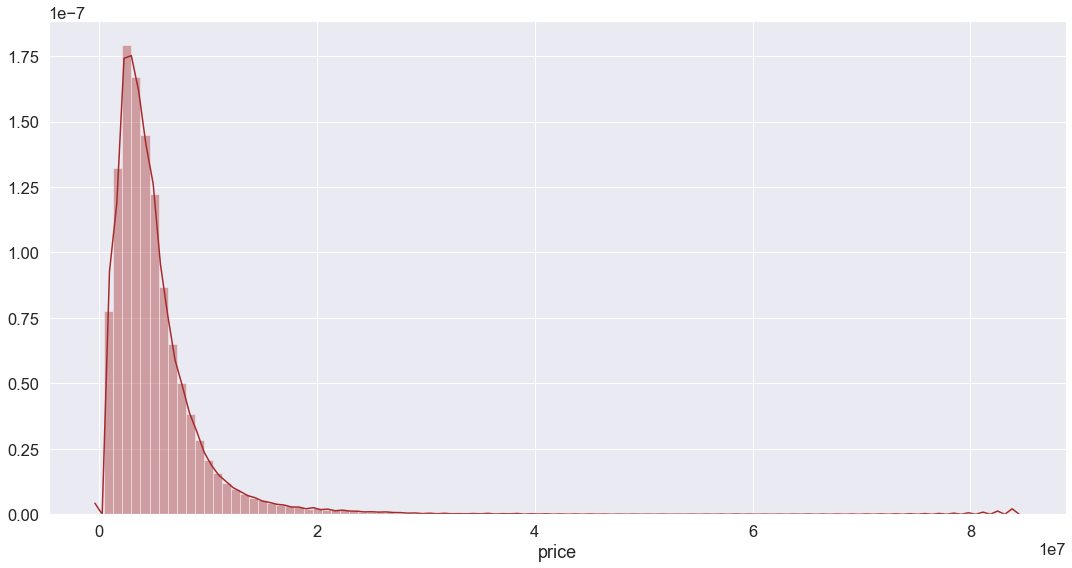

In [12]:
fig = plt.figure(figsize=(15,8))
sns.distplot(train_df['price'],bins=100,color="brown")
sns.set_style("white")
plt.tight_layout()

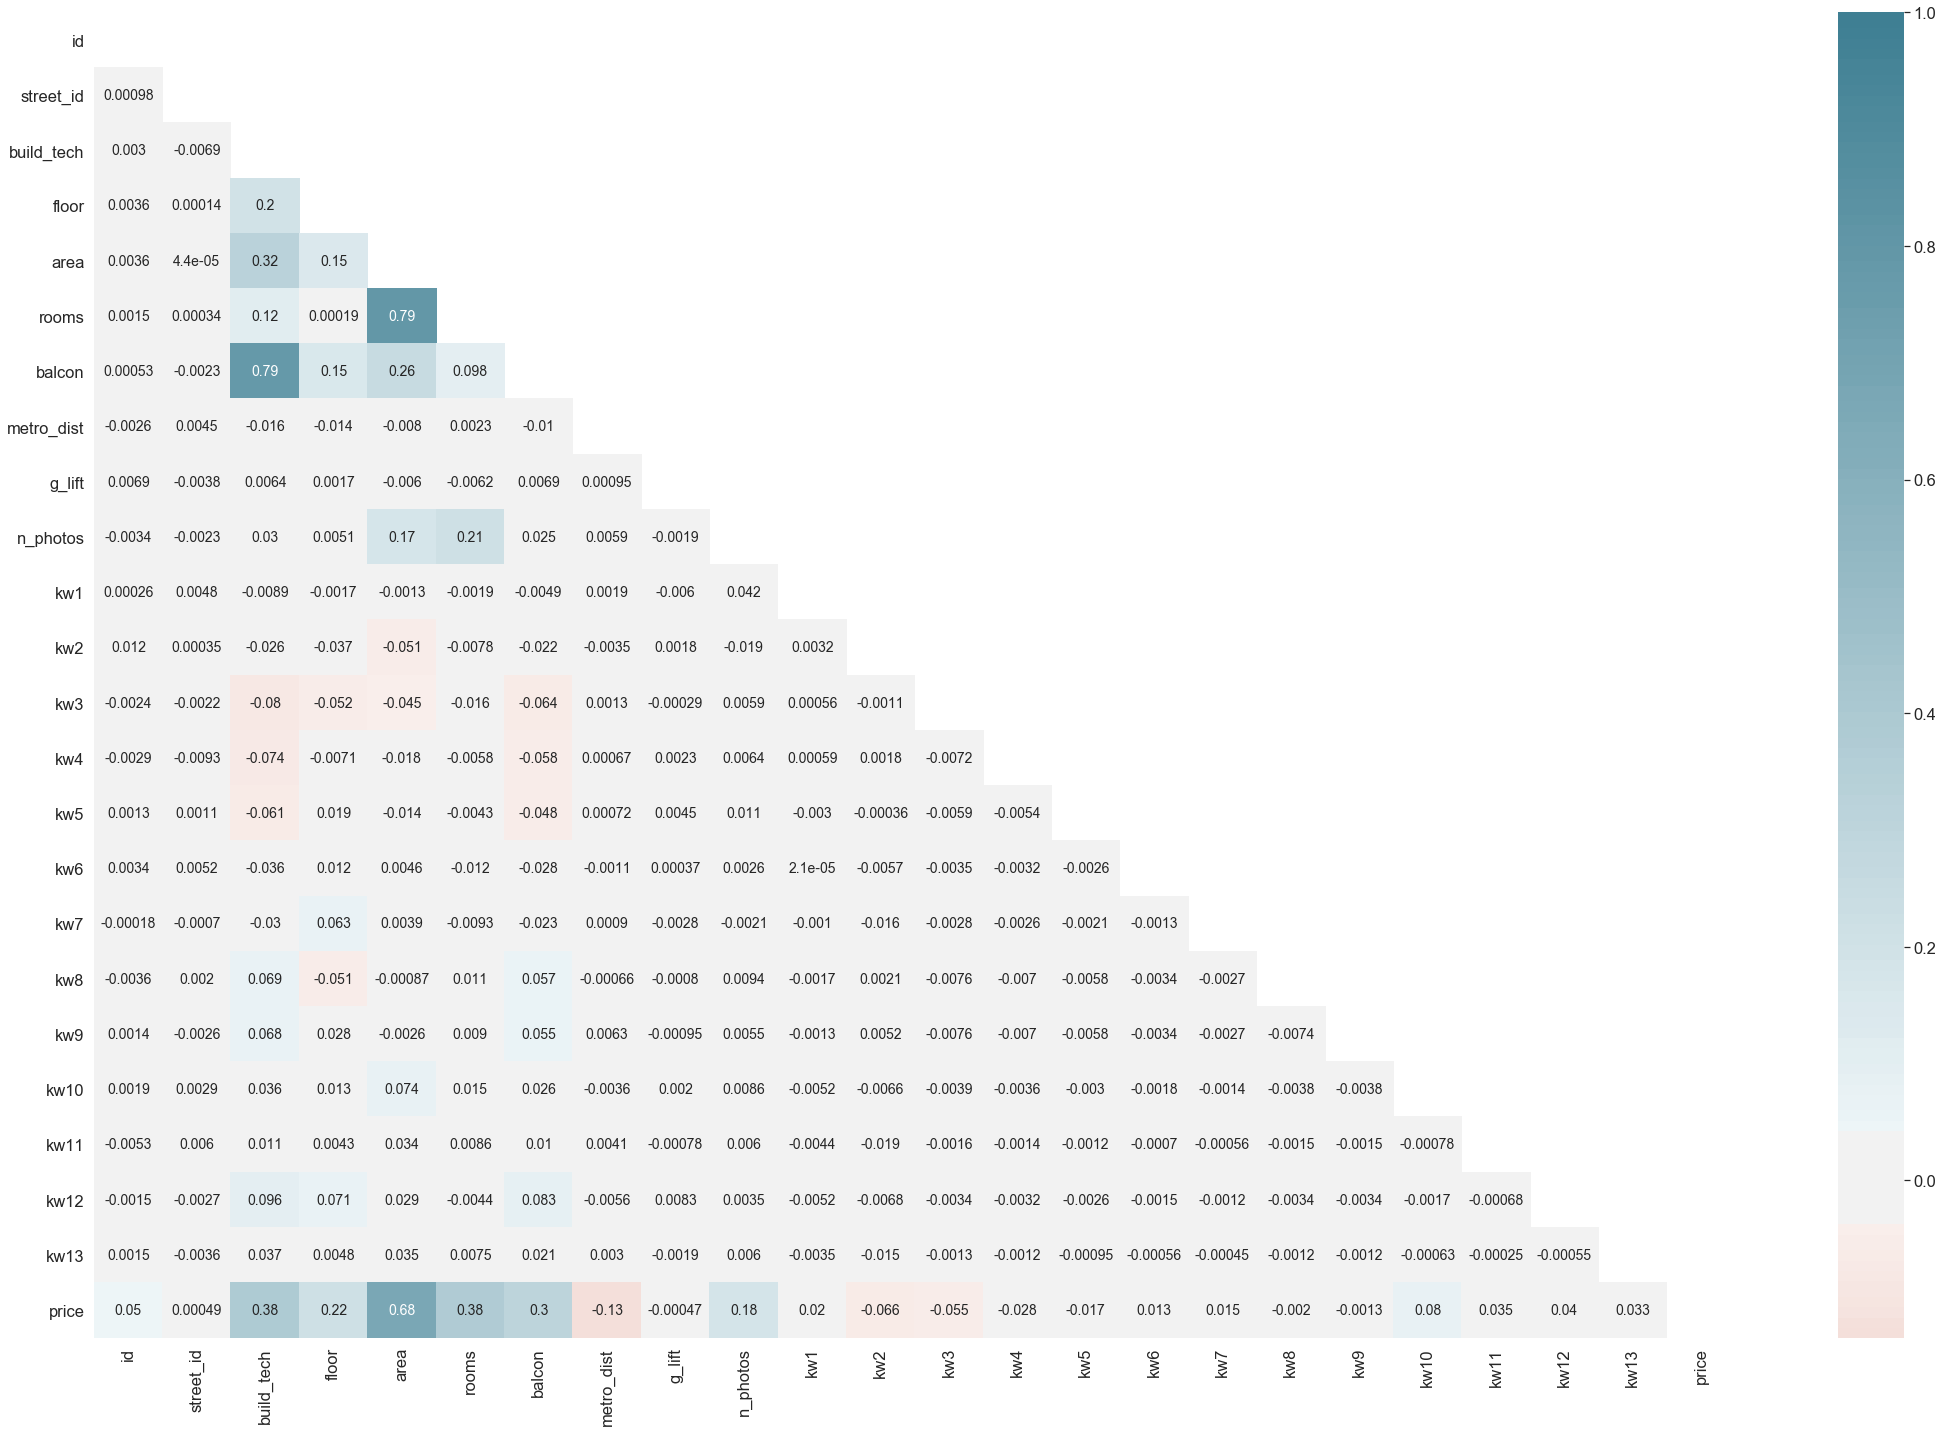

In [13]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))

mask = np.zeros_like(train_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train_df.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
            annot_kws={"size": 14},
            cbar="coolwarm",
           );
plt.tight_layout()

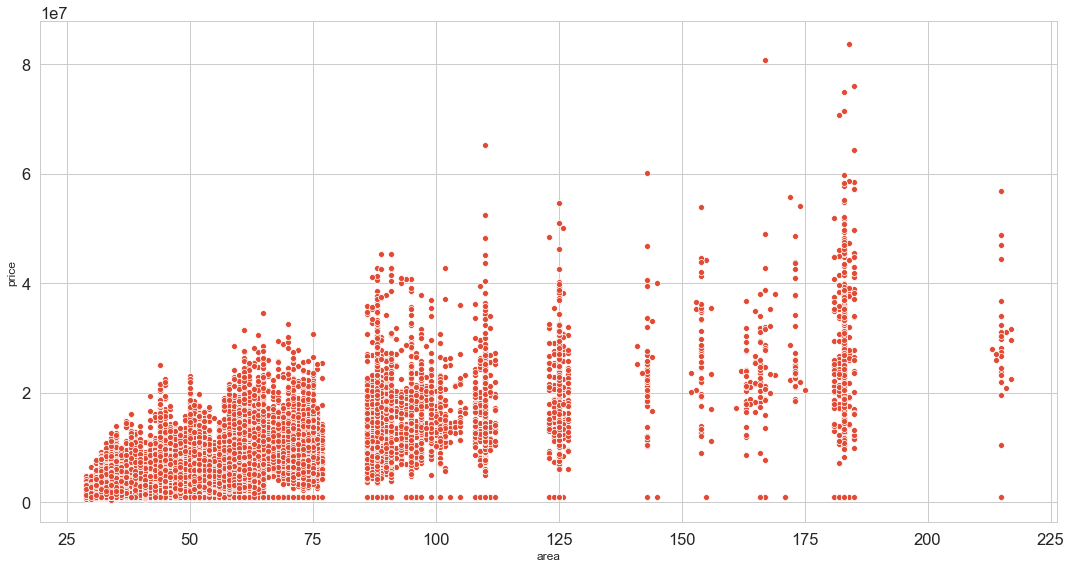

In [14]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x="area",y="price",data=train_df)
sns.set_style("whitegrid")
plt.tight_layout()

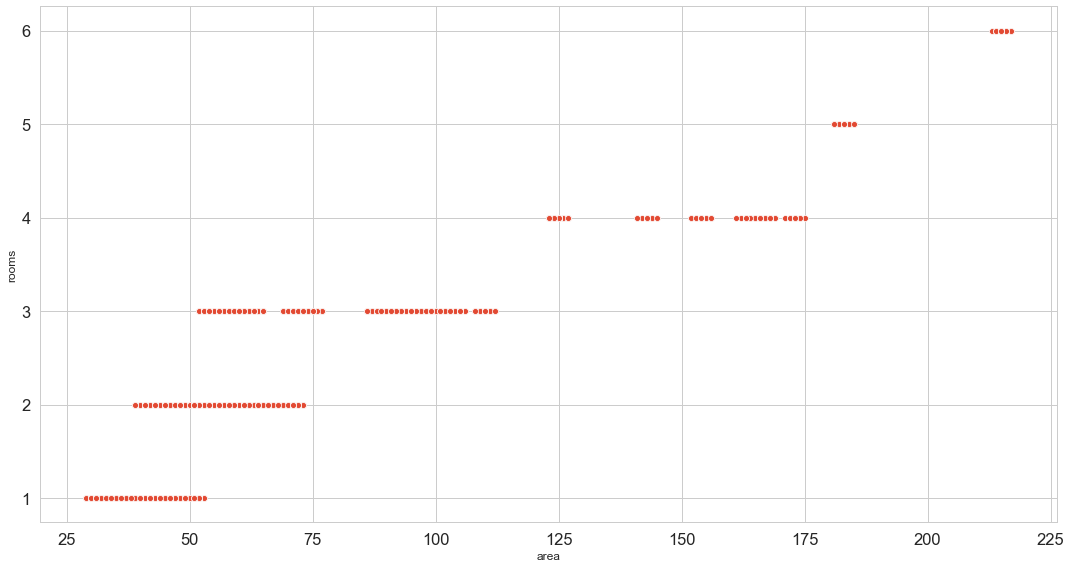

In [15]:
fig = plt.figure(figsize=(15,8))
sns.scatterplot(x="area",y="rooms",data=train_df)
sns.set_style("whitegrid")
plt.tight_layout()

In [16]:
# train_df = prev_train.copy()

In [17]:
prev_train = train_df.copy()

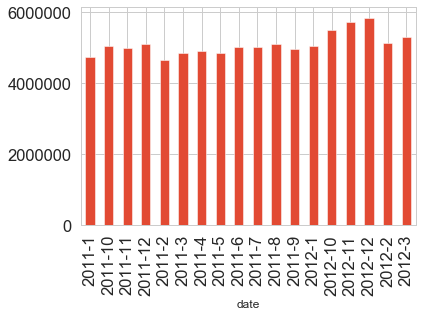

In [18]:
train_df.groupby('date')['price'].mean().plot.bar()
plt.show()

In [19]:
train_df.price.value_counts().head(10)

1000000    3968
2686000      37
1946000      31
4421000      30
2113000      30
2614000      30
2420000      29
2676000      29
3077000      28
3305000      28
Name: price, dtype: int64

In [20]:
outliers = train_df[train_df.price == 1e6][train_df[train_df.price == 1e6].area > 60].id.values # changable param
train_df.drop(outliers, inplace=True)

In [21]:
indexes = train_df[train_df['price'] == 1e6]['id'].values
train_df.drop(np.random.choice(indexes, size=len(indexes)-400, replace=False), inplace=True)

In [99]:
# !!!
# train_df['price'] = stats.boxcox(train_df['price'], lmbda=0.0))

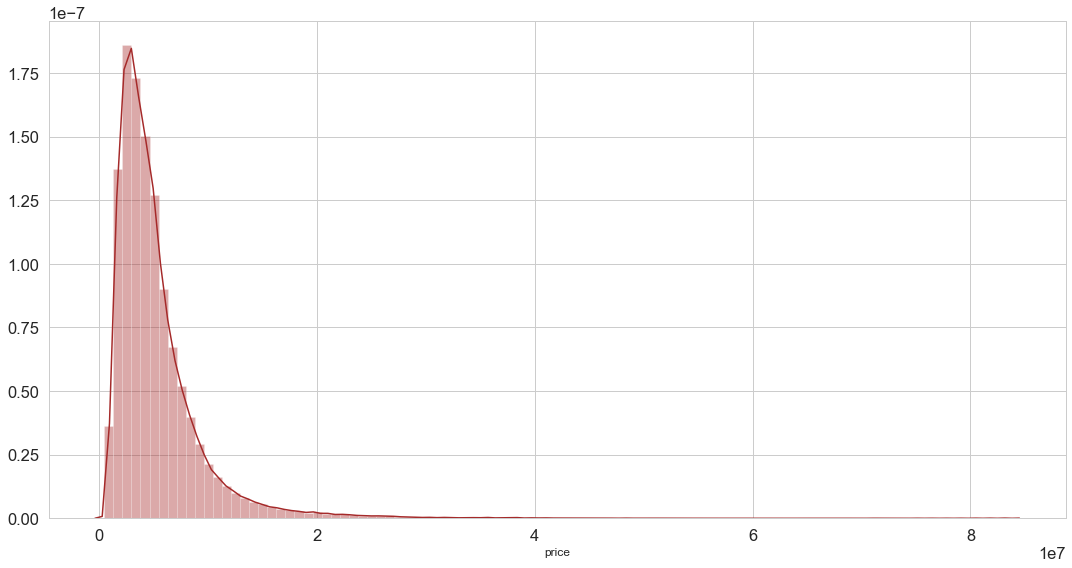

In [22]:
fig = plt.figure(figsize=(15,8))
sns.distplot(train_df['price'],bins=100,color="brown")
sns.set_style("white")
plt.tight_layout()

In [23]:
print("Skewness: " + str(train_df['price'].skew()))

Skewness: 3.64490796983968


In [24]:
all_data = pd.concat((train_df.iloc[:, :-1], test_df)).reset_index(drop=True)

In [25]:
def fill_missing(dataframe):
    dataframe['metro_dist'] = dataframe.groupby('street_id')['metro_dist'].transform(lambda x: x.fillna(x.mean()))
    dataframe['g_lift'] = dataframe.groupby('street_id')['g_lift'].transform(lambda x: x.fillna(np.round(x.mean())))
    for index, row in dataframe.iterrows(): # better to rewrite if used again
        if np.isnan(row['build_tech']):
            dataframe.at[index, 'build_tech'] = row['balcon']
    return dataframe

train_df = fill_missing(train_df)
all_data = fill_missing(all_data)

In [26]:
train_df.date.value_counts().index.sort_values()

Index(['2011-1', '2011-10', '2011-11', '2011-12', '2011-2', '2011-3', '2011-4',
       '2011-5', '2011-6', '2011-7', '2011-8', '2011-9', '2012-1', '2012-10',
       '2012-11', '2012-12', '2012-2', '2012-3'],
      dtype='object')

In [27]:
test_df.date.value_counts().index.sort_values()

Index(['2012-3', '2012-4', '2012-5', '2012-6', '2012-7', '2012-8', '2012-9',
       '2013-1', '2013-10', '2013-11', '2013-12', '2013-2', '2013-3', '2013-4',
       '2013-5', '2013-6', '2013-7', '2013-8', '2013-9'],
      dtype='object')

In [28]:
X_test_df = train_df[(train_df.date == '2012-10') | 
                     (train_df.date == '2012-11') | 
                     (train_df.date == '2012-12')]
test_indexes = X_test_df.id.values

In [29]:
print('mean test target:', X_test_df.price.mean())

mean test target: 5870983.266482828


In [30]:
train_indexes = np.setxor1d(train_df.id.values, test_indexes)
X_train_df = train_df.loc[train_indexes]

In [31]:
print('mean train target:', X_train_df.price.mean())

mean train target: 5129122.235200557


In [47]:
mean_price_0 = X_train_df.groupby('street_id')['price'].mean()
X_train_df['mean_square_root_price'] = pd.Series(data=(mean_price_0[X_train_df['street_id']].reset_index(drop=True) / X_train_df['area'].reset_index(drop=True)).values, index=X_train_df.id)

X_test_df['mean_square_root_price'] = pd.Series(data=(mean_price_0[X_test_df['street_id']].reset_index(drop=True) / X_test_df['area'].reset_index(drop=True)).values, index=X_test_df.id)

In [51]:
X_train_df['avg_room_area'] = X_train_df['area'] / X_train_df['rooms']
X_train_df['area_and_balcon'] = X_train_df['area'] + 5. * X_train_df['balcon']

X_test_df['avg_room_area'] = X_test_df['area'] / X_test_df['rooms']
X_test_df['area_and_balcon'] = X_test_df['area'] + 5. * X_test_df['balcon']

In [52]:
mean_floor_price_0 = X_train_df.groupby(['street_id', 'floor'])['price'].mean()

In [53]:
X_train_df['mean_street_floor_square_price'] = mean_floor_price_0[
    list(zip(X_train_df.street_id, X_train_df.floor))].values / X_train_df.area

In [54]:
def getClosest_0(street, floor):
    ex_floor = min(mean_floor_price_0[street].keys(), key=lambda x:abs(x-floor))
    return mean_floor_price_0[street, ex_floor]

In [55]:
temp_series = pd.Series()
for index, row in tqdm(X_test_df.iterrows()):
    try:
        temp_series.at[index] = mean_floor_price_0[row['street_id'], row['floor']] / row['area']
    except KeyError:
        temp_series.at[index] = getClosest_0(row['street_id'], row['floor']) / row['area']

15956it [00:25, 631.20it/s]


In [56]:
X_test_df['mean_street_floor_square_price'] = temp_series

In [57]:
X_train_df['metro_dist'] = X_train_df['metro_dist'].div(5).round(0) * 5.
X_train_df['metro_dist'] = 30.0 - X_train_df['metro_dist']

X_test_df['metro_dist'] = X_test_df['metro_dist'].div(5).round(0) * 5.
X_test_df['metro_dist'] = 30.0 - X_test_df['metro_dist']

In [70]:
mean_price_1 = train_df.groupby('street_id')['price'].mean()
all_data['mean_square_root_price'] = mean_price_1[all_data['street_id']].reset_index(drop=True) / all_data['area']

In [71]:
all_data['avg_room_area'] = all_data['area'] / all_data['rooms']
all_data['area_and_balcon'] = all_data['area'] + 5. * all_data['balcon']

In [83]:
mean_floor_price_1 = train_df.groupby(['street_id', 'floor'])['price'].mean()

In [84]:
all_data['mean_street_floor_square_price'] = np.zeros(len(all_data))
all_data.mean_street_floor_square_price.iloc[:len(train_df)] = mean_floor_price_1[
    list(zip(train_df.street_id, train_df.floor))].values / train_df.area.reset_index(drop=True)

In [85]:
def getClosest_1(street, floor):
    ex_floor = min(mean_floor_price_1[street].keys(), key=lambda x:abs(x-floor))
    return mean_floor_price_1[street, ex_floor]

In [86]:
temp_series = pd.Series()
for i, (index, row) in enumerate(all_data[len(train_df):].iterrows()):
    try:
        temp_series.at[index] = mean_floor_price_1[row['street_id'], row['floor']] / row['area']
    except KeyError:
        temp_series.at[index] = getClosest_1(row['street_id'], row['floor']) / row['area']
    if i % 1e4 == 0:
        print(i)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


In [89]:
all_data.mean_street_floor_square_price.iloc[len(train_df):] = temp_series

In [90]:
all_data['metro_dist'] = all_data['metro_dist'].div(5).round(0) * 5.
all_data['metro_dist'] = 30.0 - all_data['metro_dist']

In [93]:
Train_filled = all_data.iloc[:len(train_df)]
Train_filled = pd.concat((Train_filled, train_df.iloc[:, -1].reset_index(drop=True)), axis=1)

In [99]:
X_train_df = X_train_df[[c for c in X_train_df if c not in ['price']] + ['price']]
X_test_df = X_test_df[[c for c in X_test_df if c not in ['price']] + ['price']]

In [106]:
X_train_df.to_csv('dataset/X_train.csv', index=None)
X_test_df.to_csv('dataset/X_test.csv', index=None)

In [137]:
all_data_nodummy = all_data.drop(columns=['id']).copy()

In [139]:
num_cols = ['area', 'n_photos', 'rooms', 'metro_dist', 'floor', 'mean_square_root_price', 
            'avg_room_area', 'area_and_balcon', 'mean_street_floor_square_price']
cat_cols = ['street_id', 'build_tech', 'balcon', 'date'] # rooms, n_photos ???
drop_cols = ['id']

all_data.drop(columns=drop_cols, axis=1, inplace=True)
all_data = pd.get_dummies(all_data, columns=cat_cols, prefix=cat_cols)

In [41]:
y = train_df['price'].reset_index(drop=True)
train_df.drop(columns=['price'], axis=1, inplace=True)

In [ ]:
temp_train = all_data.iloc[:len(y), :].copy()
temp_test = all_data.iloc[len(y):, :].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
temp_train[num_cols] = scaler.fit_transform(temp_train[num_cols])
temp_test[num_cols] = scaler.transform(temp_test[num_cols])

In [ ]:
temp_train.head()

,floor,area,rooms,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,mean_square_root_price,avg_room_area,area_and_balcon,mean_street_floor_square_price,street_id_0,street_id_1,street_id_2,street_id_3,street_id_4,street_id_5,street_id_6,street_id_7,street_id_8,street_id_9,street_id_10,street_id_11,street_id_12,street_id_13,street_id_14,street_id_15,street_id_16,...,build_tech_2.0,balcon_0,balcon_1,balcon_2,date_2011-1,date_2011-10,date_2011-11,date_2011-12,date_2011-2,date_2011-3,date_2011-4,date_2011-5,date_2011-6,date_2011-7,date_2011-8,date_2011-9,date_2012-1,date_2012-10,date_2012-11,date_2012-12,date_2012-2,date_2012-3,date_2012-4,date_2012-5,date_2012-6,date_2012-7,date_2012-8,date_2012-9,date_2013-1,date_2013-10,date_2013-11,date_2013-12,date_2013-2,date_2013-3,date_2013-4,date_2013-5,date_2013-6,date_2013-7,date_2013-8,date_2013-9
0,-0.340397,-0.525352,-0.138209,-0.981494,1.0,-0.769091,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.769999,-0.775468,-0.606909,-0.641656,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.587577,-1.095884,-1.349399,0.836613,1.0,-0.262587,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.609896,0.975426,-1.149298,-0.709868,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.895506,-1.038831,-1.349399,-0.375458,1.0,0.750423,0,1,0,0,0,0,0,0,0,0,0,0,0,0.210112,1.127678,-1.095059,0.208831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.340397,0.444553,1.072981,0.836613,0.0,-0.262587,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.637888,-1.003846,0.315151,-0.609544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.587577,-0.183032,-0.138209,-0.981494,0.0,-0.262587,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.997940,-0.318713,-0.281476,-0.979542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
temp_train.shape

(96100, 737)

In [ ]:
temp_test.head()

,floor,area,rooms,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,mean_square_root_price,avg_room_area,area_and_balcon,mean_street_floor_square_price,street_id_0,street_id_1,street_id_2,street_id_3,street_id_4,street_id_5,street_id_6,street_id_7,street_id_8,street_id_9,street_id_10,street_id_11,street_id_12,street_id_13,street_id_14,street_id_15,street_id_16,...,build_tech_2.0,balcon_0,balcon_1,balcon_2,date_2011-1,date_2011-10,date_2011-11,date_2011-12,date_2011-2,date_2011-3,date_2011-4,date_2011-5,date_2011-6,date_2011-7,date_2011-8,date_2011-9,date_2012-1,date_2012-10,date_2012-11,date_2012-12,date_2012-2,date_2012-3,date_2012-4,date_2012-5,date_2012-6,date_2012-7,date_2012-8,date_2012-9,date_2013-1,date_2013-10,date_2013-11,date_2013-12,date_2013-2,date_2013-3,date_2013-4,date_2013-5,date_2013-6,date_2013-7,date_2013-8,date_2013-9
96100,-1.081939,0.387500,1.072981,-0.375458,0.0,-0.769091,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.087173,-1.054597,0.260912,-0.621627,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96101,1.142687,0.330447,-0.138209,0.230577,0.0,0.750423,0,1,0,0,0,0,1,0,0,0,0,0,0,0.434322,0.366419,0.206673,1.309310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96102,-0.587577,0.102234,-0.138209,1.442648,0.0,-0.262587,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.379287,0.061916,-0.010282,-0.896805,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96103,-0.340397,-0.981778,-1.349399,-0.375458,1.0,-1.275596,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.109690,1.279930,-1.040820,-0.572821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
96104,-0.340397,0.216340,1.072981,-0.981494,0.0,-0.262587,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.654439,-1.206848,0.098195,-0.737983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
